# Step 1 : Reading and Understanding Data

In [1144]:
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [1145]:
# Import EDA modules
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Import model building modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [1146]:
# Change pandas info display option
pd.set_option("display.min_rows",500) 
pd.set_option("display.max_columns",500) 
pd.set_option("display.max_rows",500)

In [1147]:
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1148]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1149]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1150]:
# Remove "instant" as it is just an index.
# Remove "dteday" since we've extracted month, year, and day.
# Remove "casual" and "registered" as "cnt" is their sum. "cnt" can be our target variable

bike_df = bike_df.drop(columns=["instant",  "dteday", "casual", "registered"])
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1151]:
# Renaming columns for better understanding
bike_df.rename(columns={"yr": "year", "mnth": "month", "hum": "humidity", "cnt": "count"}, inplace=True)
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1152]:
# Encoding/mapping

bike_df["season"] = bike_df["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike_df["month"] = bike_df["month"].map({1:"January", 2:"February", 3:"March", 4:"Arpil", 5:"May", 6:"June", 7:"July", 8:"August",
                                         9:"September", 10:"October", 11:"November", 12:"December"})
bike_df["weekday"] = bike_df["weekday"].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"})
bike_df["weathersit"] = bike_df["weathersit"].map({1:"Clear", 2:"Misty", 3:"Light", 4:"Heavy"})
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,January,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


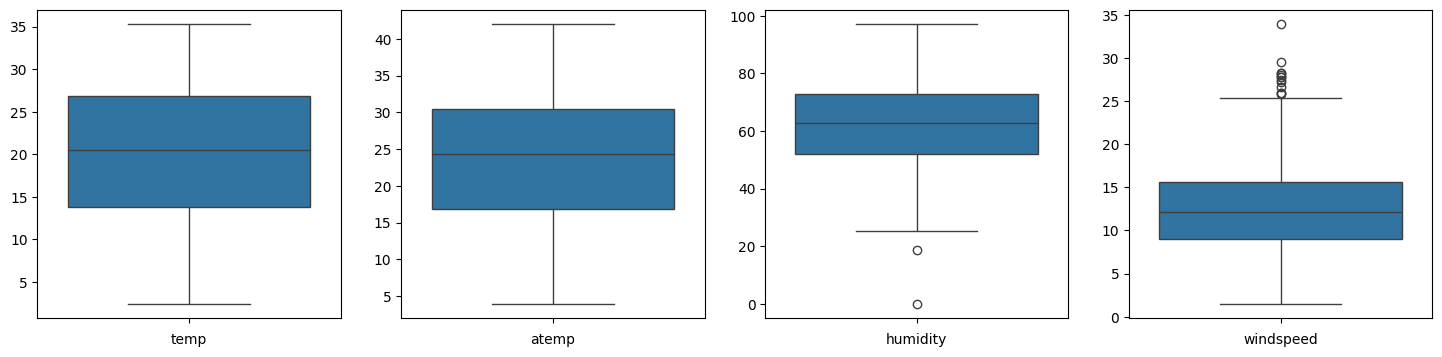

In [1153]:
# Check for outliers
columns = ["temp", "atemp", "humidity", "windspeed"]
plt.figure(figsize=(18,4))

i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    plt.xlabel(col)
    plt.ylabel("")
    i+=1

- From boxplots it is clear that we don't have any significant outliers

# Step 2 : Visualizing Data

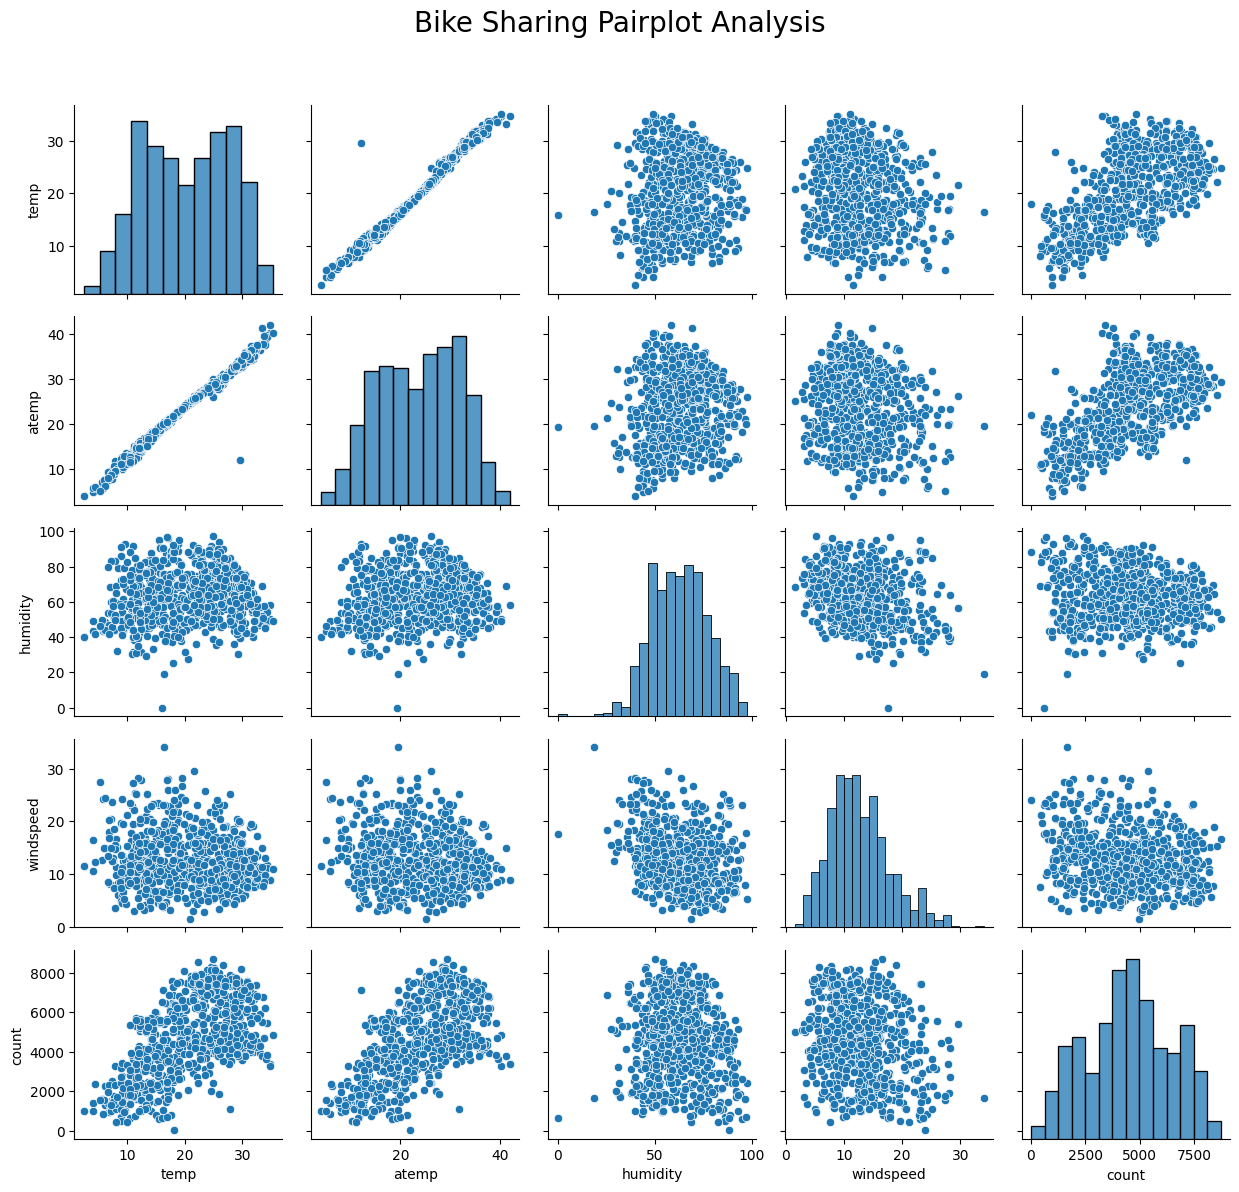

In [1156]:
# Visualising numerical variables
sns.pairplot(bike_df[["temp", "atemp", "humidity", "windspeed", "count"]])
plt.suptitle('Bike Sharing Pairplot Analysis', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## Insights
1. **Temp vs. Atemp:** Strong positive correlation between temperature (temp) and apparent temperature (atemp).
2. **Count Increases with Temperature:** Higher temp and atemp lead to higher count.
3. **Humidity and Windspeed:** Both variables show more varied distributions and do not have a strong correlation with count.

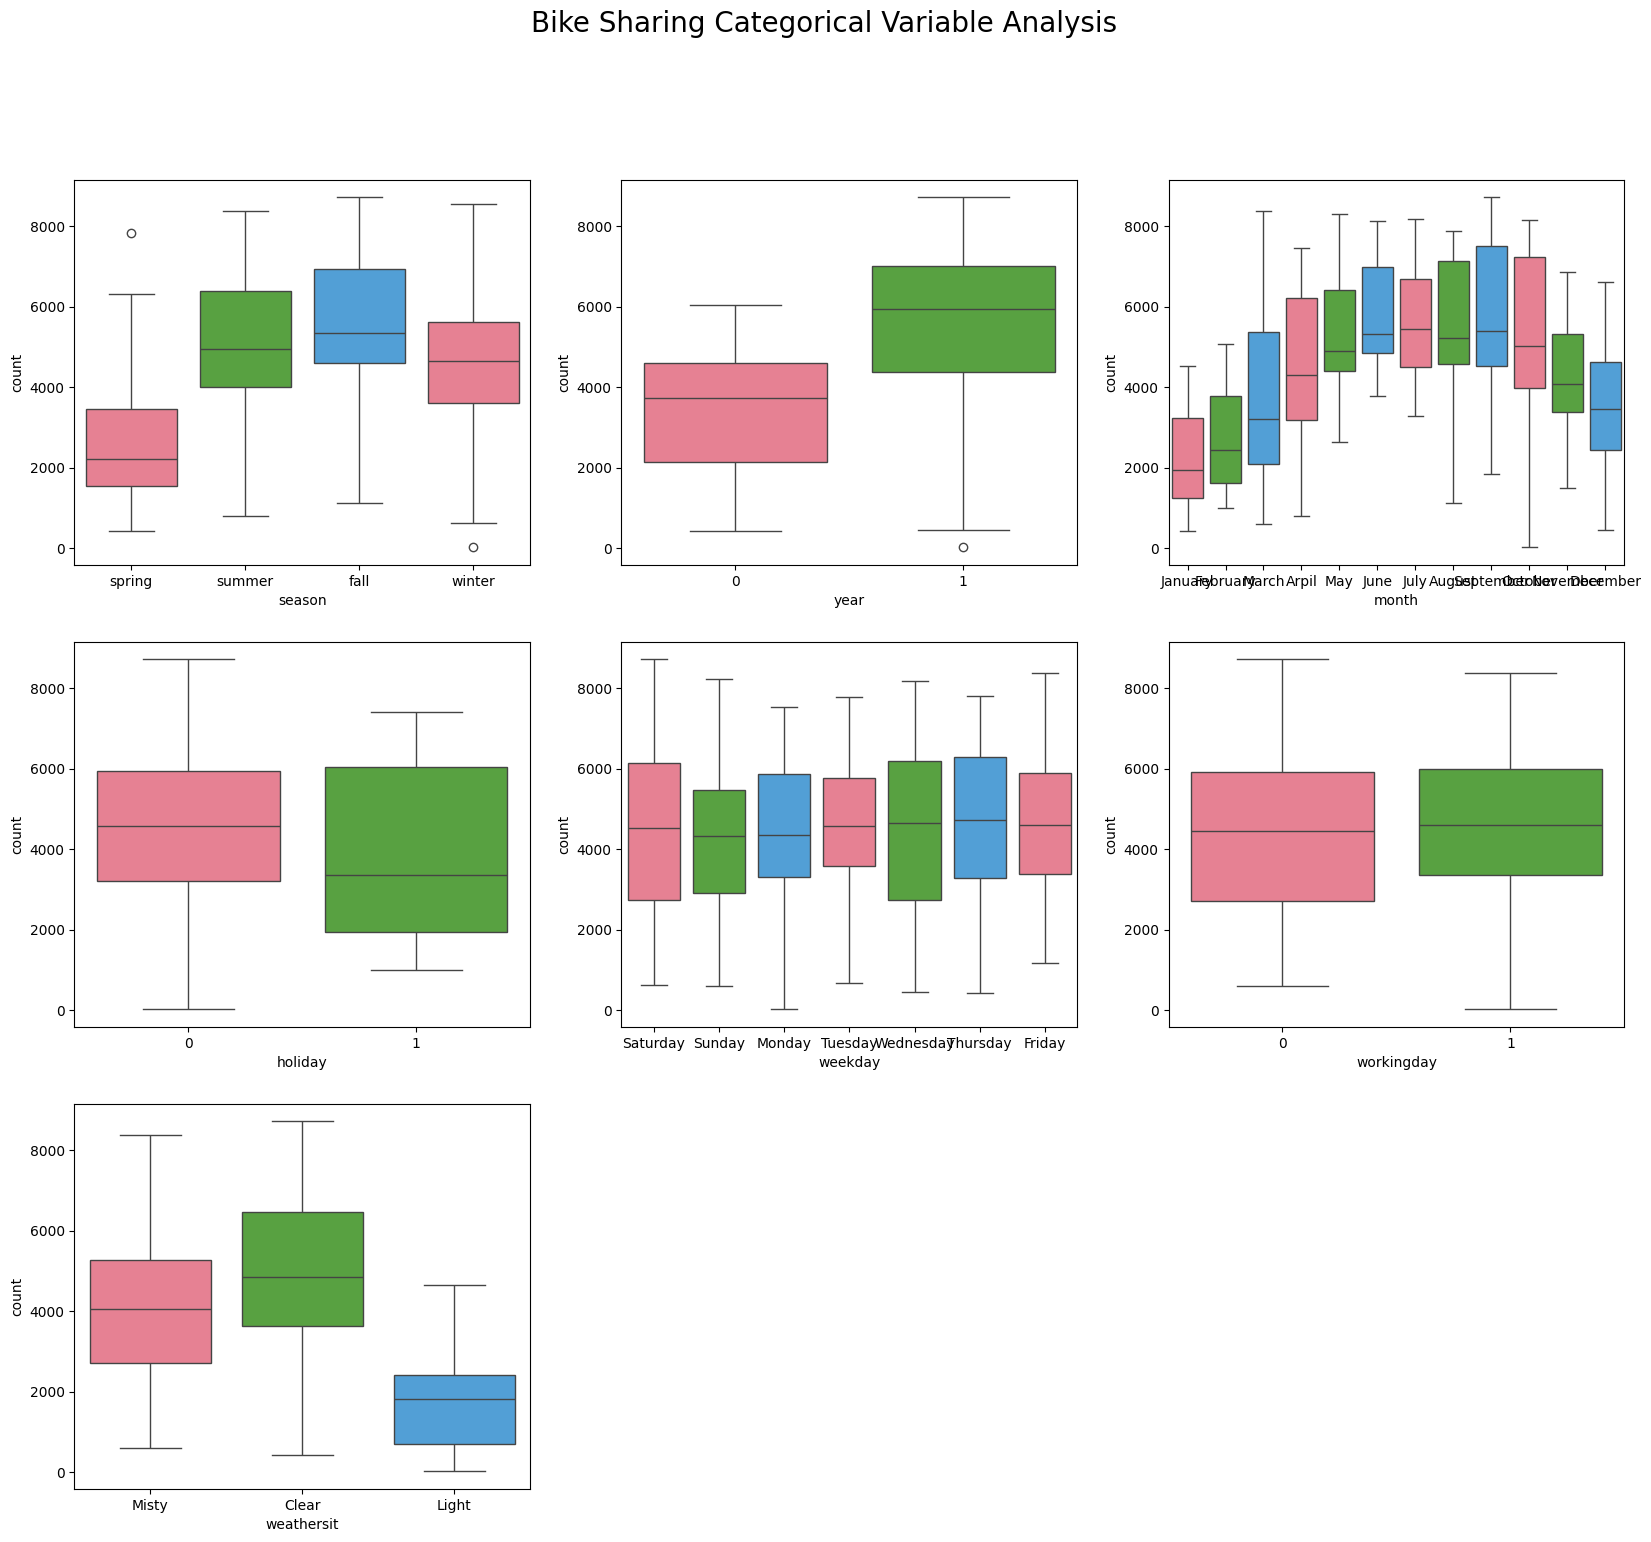

In [1158]:
# Visualising categorical variables

plt.figure(figsize=(20, 17))
palette = sns.color_palette("husl", 3)
                            
plt.subplot(3, 3, 1)
sns.boxplot(x = "season", y = "count", data = bike_df, palette=palette)
plt.subplot(3, 3, 2)
sns.boxplot(x = "year", y = "count", data = bike_df, palette=palette)
plt.subplot(3, 3, 3)
sns.boxplot(x = "month", y = "count", data = bike_df, palette=palette)
plt.subplot(3, 3, 4)
sns.boxplot(x = "holiday", y = "count", data = bike_df, palette=palette)
plt.subplot(3, 3, 5)
sns.boxplot(x = "weekday", y = "count", data = bike_df, palette=palette)
plt.subplot(3, 3, 6)
sns.boxplot(x = "workingday", y = "count", data = bike_df, palette=palette)
plt.subplot(3, 3, 7)
sns.boxplot(x = "weathersit", y = "count", data = bike_df, palette=palette)

plt.suptitle('Bike Sharing Categorical Variable Analysis', fontsize=20)

plt.show()

### Insights

**1. Season and Bike Rentals:**
   Highest rentals in summer and fall. Lowest rentals in spring and winter.
   
**2. Yearly Trend:**
Rentals increased significantly in the second year compared to the first year.

**3. Weather Impact:**
Clear weather leads to the highest rentals. Rentals drop significantly in light rain or snow.

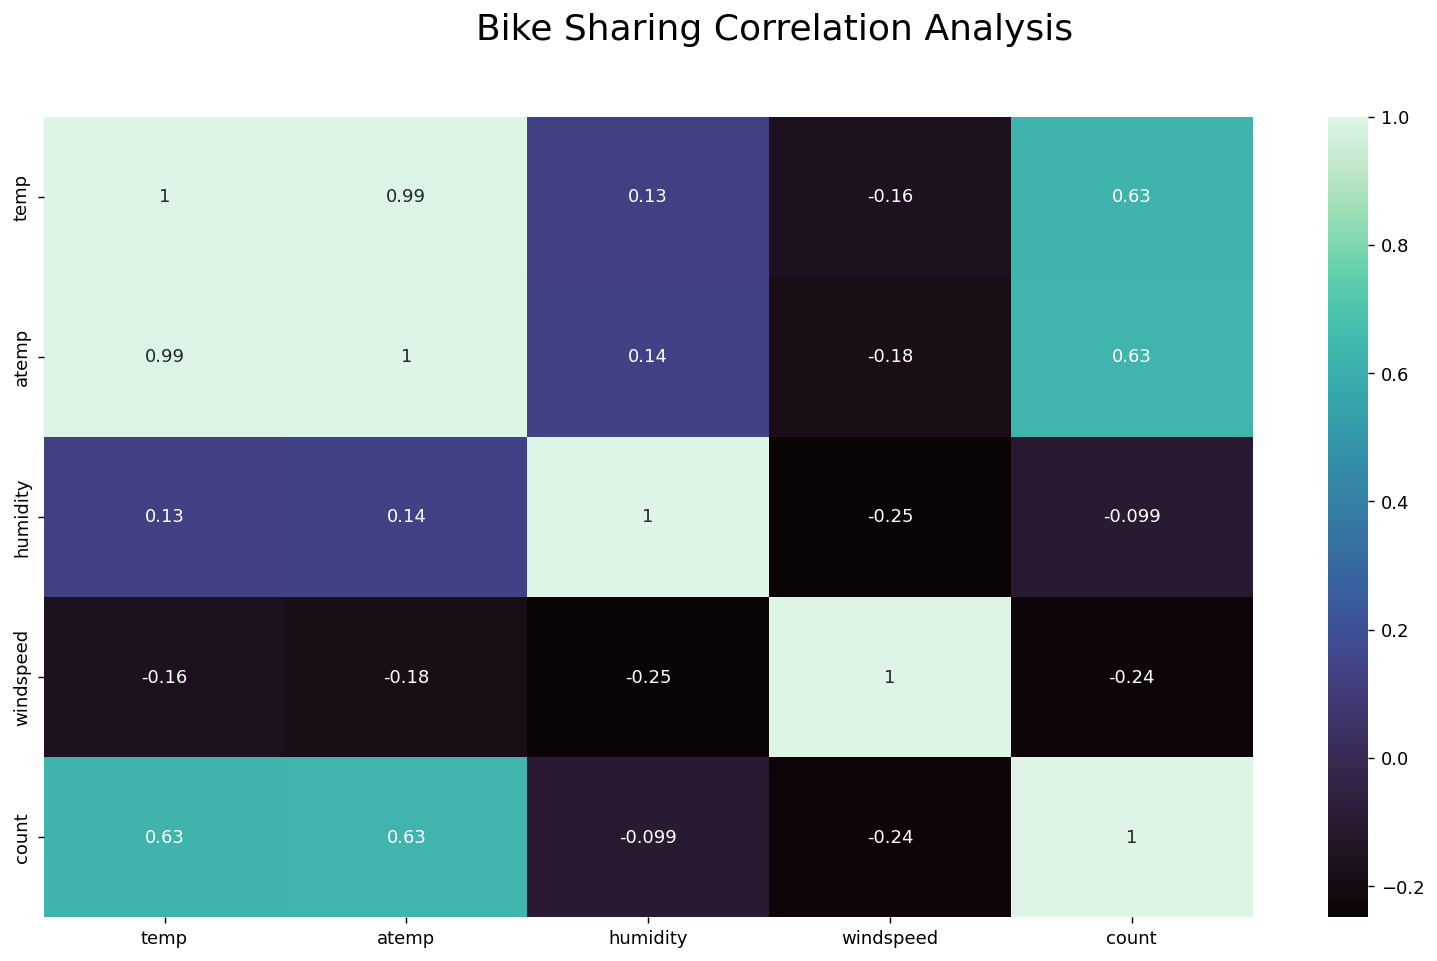

In [1160]:
num_features = ["temp", "atemp", "humidity", "windspeed", "count"]
plt.figure(figsize=(15,8),dpi=130)
sns.heatmap(bike_df[num_features].corr(),annot= True,cmap="mako")

plt.suptitle('Bike Sharing Correlation Analysis', fontsize=20)

plt.show()

**Strong Positive Correlation:**
Temp and Atemp: There is a very strong positive correlation (0.99), indicating that these two variables are almost perfectly correlated. Also confirming out initial pariplot observation.

**Moderate Positive Correlation with Count:**
Temp and Atemp: Both show a moderate positive correlation with count (0.63), suggesting that higher temperatures are associated with higher counts.

**Weak Negative Correlation:**
Windspeed: Shows a weak negative correlation with temp (-0.16), atemp (-0.18), and count (-0.24).

# Step 3 : Preparing Data for Linera Regression

- ***Encoding (Categorical variables to the dummy variables)***

In [1164]:
bike_sharing_df.head()

,season,year,Month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1165]:
# Create dummy variables

month_df = pd.get_dummies(bike_df["month"],drop_first=True).astype(int)
weekdays_df = pd.get_dummies(bike_df["weekday"],drop_first=True).astype(int)
weathersit_df = pd.get_dummies(bike_df["weathersit"],drop_first=True).astype(int)
seasons_df = pd.get_dummies(bike_df["season"],drop_first=True).astype(int)

In [1166]:
# Merge dummy variables
bike_df = pd.concat([bike_df, month_df, weekdays_df, weathersit_df, seasons_df], axis=1)

In [1167]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Misty,spring,summer,winter
0,spring,0,January,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,spring,0,January,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [1168]:
# Drop unnecessary columns as we have already created dummy variable out of it.

bike_df.drop(["season", "month", "weekday", "weathersit"], axis = 1, inplace = True)

In [1169]:
bike_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [1170]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   count       730 non-null    int64  
 8   August      730 non-null    int32  
 9   December    730 non-null    int32  
 10  February    730 non-null    int32  
 11  January     730 non-null    int32  
 12  July        730 non-null    int32  
 13  June        730 non-null    int32  
 14  March       730 non-null    int32  
 15  May         730 non-null    int32  
 16  November    730 non-null    int32  
 17  October     730 non-null    int32  
 18  September   730 non-null    int32  
 19  Monday      730 non-null    i

- ***Splitting into the Train-Test***

In [1172]:
df_train, df_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [1173]:
df_train.shape

(510, 30)

In [1174]:
df_test.shape

(220, 30)

- ***Rescaling variables***

In [1176]:
# Scaling using MinMaxScaler 
scaler = MinMaxScaler()

In [1177]:
bike_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [1178]:
scaling_vars = ["temp", "atemp", "humidity", "windspeed", "count"]
df_train[scaling_vars] = scaler.fit_transform(df_train[scaling_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [1179]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 4 : Model Building

In [1181]:
# Removing target variable
y_train = df_train.pop("count")
X_train = df_train

In [1182]:
# Build a Model with all variables
X_train_sm = sm.add_constant(X_train)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# fit model
lr_model_0 = lr.fit()

# Display params
lr_model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.81e-180
Time:                        22:01:46   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2433      0.035      6.887      0.000       0.174       0.313
year           0.2325      0.008     28.794      0.000       0.217       0.248
holiday        0.0109      0.024      0.451      0.652      -0.037       0.058
workingday     0.0963      0.012      7.835      0.000       0.072       0.120
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
humidity      -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
August         0.0223      0.034      0.657      0.511      -0.044       0.089
December      -0.0443      0.034     -1.316      0.189      -0.110       0.022
February      -0.0323      0.033     -0.980      0.327      -0.097       0.032
January       -0.0631      0.034     -1.876      0.061      -0.129       0.003
July          -0.0327      0.035     -0.931      0.352      -0.102       0.036
June           0.0060      0.025      0.241      0.810      -0.043       0.055
March          0.0016      0.025      0.063      0.950      -0.047       0.050
May            0.0255      0.021      1.208      0.228      -0.016       0.067
November      -0.0398      0.036     -1.093      0.275      -0.111       0.032
October        0.0077      0.036      0.215      0.830      -0.063       0.078
September      0.0868      0.032      2.711      0.007       0.024       0.150
Monday        -0.0216      0.015     -1.401      0.162      -0.052       0.009
Saturday       0.0952      0.014      6.910      0.000       0.068       0.122
Sunday         0.0410      0.014      2.929      0.004       0.013       0.068
Thursday      -0.0097      0.016     -0.623      0.534      -0.040       0.021
Tuesday       -0.0184      0.016     -1.184      0.237      -0.049       0.012
Wednesday     -0.0059      0.015     -0.394      0.694      -0.035       0.023
Light         -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Misty         -0.0595      0.010     -5.701      0.000      -0.080      -0.039
spring        -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer         0.0424      0.026      1.617      0.107      -0.009       0.094
winter         0.1071      0.028      3.826      0.000       0.052       0.162
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     7.23e+15
==============================================================================

N

# VIF

In [1184]:
# Function to calculate VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [1185]:
calculateVIF(X_train)

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
19,Saturday,19.71
20,Sunday,18.34
26,spring,10.77
28,winter,9.46
27,summer,8.29
15,November,6.79
7,August,6.47


# RFE

-  Multiple columns have high p-values and high VIFs. We will use RFE to select important features.


In [1188]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

# Selected list of features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('August', False, 8),
 ('December', False, 4),
 ('February', False, 5),
 ('January', False, 2),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 15),
 ('May', False, 6),
 ('November', False, 3),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 14),
 ('Light', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [1189]:
rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'July', 'September', 'Saturday', 'Sunday', 'Light', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')

In [1190]:
X_train_rfe = X_train[rfe_features]

In [1191]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
8,Saturday,12.20
9,Sunday,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,humidity,1.91
11,Misty,1.57


#### Model 1

In [1193]:
# Build a Model 
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Create Model
lr = sm.OLS(y_train, X_train_lm_1)

# fit the model
lr_model_1 = lr.fit()

# Display Params
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.11e-191
Time:                        22:01:47   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.000       0.145       0.254
year           0.2298      0.008     28.647      0.000       0.214       0.246
holiday       -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday     0.0837      0.010      8.665      0.000       0.065       0.103
temp           0.5277      0.033     15.884      0.000       0.462       0.593
humidity      -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
September      0.0820      0.017      4.966      0.000       0.050       0.114
Saturday       0.0937      0.012      8.040      0.000       0.071       0.117
Sunday         0.0406      0.012      3.315      0.001       0.017       0.065
Light         -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Misty         -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer         0.0537      0.015      3.631      0.000       0.025       0.083
winter         0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     6.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Model 2

In [1195]:
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Build a Model 
X_train_lm_2 = sm.add_constant(X_train_new)

# Create Model
lr = sm.OLS(y_train, X_train_lm_2)

# fit the model
lr_model_2 = lr.fit()

# Display Params
print(lr_model_2.summary())

print(calculateVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.11e-191
Time:                        22:01:47   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2832      0.034      8.300      0.0

#### Model 3

In [1197]:
X_train_new = X_train_new.drop(["humidity"], axis = 1)

# Build a Model 
X_train_lm_3 = sm.add_constant(X_train_new)

# Create Model
lr = sm.OLS(y_train, X_train_lm_3)

# fit the model
lr_model_3 = lr.fit()

# Display Params
print(lr_model_3.summary())

print(calculateVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.28e-188
Time:                        22:01:47   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2037      0.029      6.972      0.0

- Given the balanced VIF and p-value, we can consider lr_model_3 as the optimal model.

In [1199]:
lr_model_3.params

const        0.203679
year         0.233727
holiday     -0.102859
temp         0.491531
windspeed   -0.149066
July        -0.049633
September    0.075934
Saturday     0.011757
Sunday      -0.046120
Light       -0.289513
Misty       -0.082161
spring      -0.065505
summer       0.047677
winter       0.084588
dtype: float64

# Step 5 : Residual Analysis

In [1201]:
X_train_lm_3

,const,year,holiday,temp,windspeed,July,September,Saturday,Sunday,Light,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,0,0,1,0,1,0
580,1.0,1,0,0.914852,0.462538,0,0,1,0,0,0,0,0,0
500,1.0,1,0,0.719639,0.172431,0,0,0,0,0,0,0,1,0
479,1.0,1,0,0.520271,0.164434,0,0,0,0,0,0,0,1,0
472,1.0,1,0,0.503656,0.270032,0,0,0,0,0,1,0,1,0
455,1.0,1,0,0.456929,0.279394,0,0,0,1,0,1,0,1,0


In [1202]:
y_train_pred = lr_model_3.predict(X_train_lm_3)

### Normality of error terms

Text(0.5, 0, 'Errors')

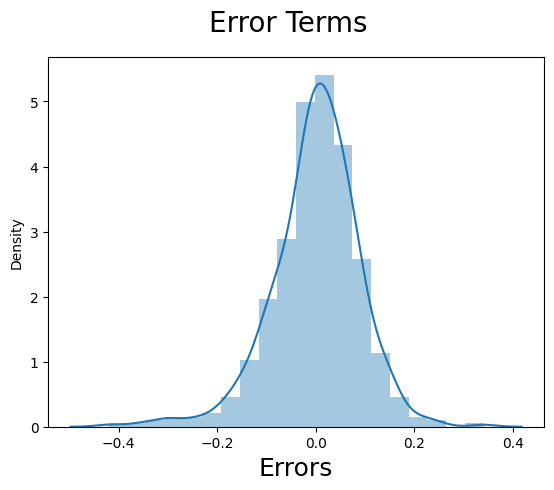

In [1204]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

### Multi Colinearity

In [1207]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.63
11,summer,2.24
10,spring,2.13
0,year,2.07
12,winter,1.84
4,July,1.59
9,Misty,1.56
5,September,1.34
6,Saturday,1.23


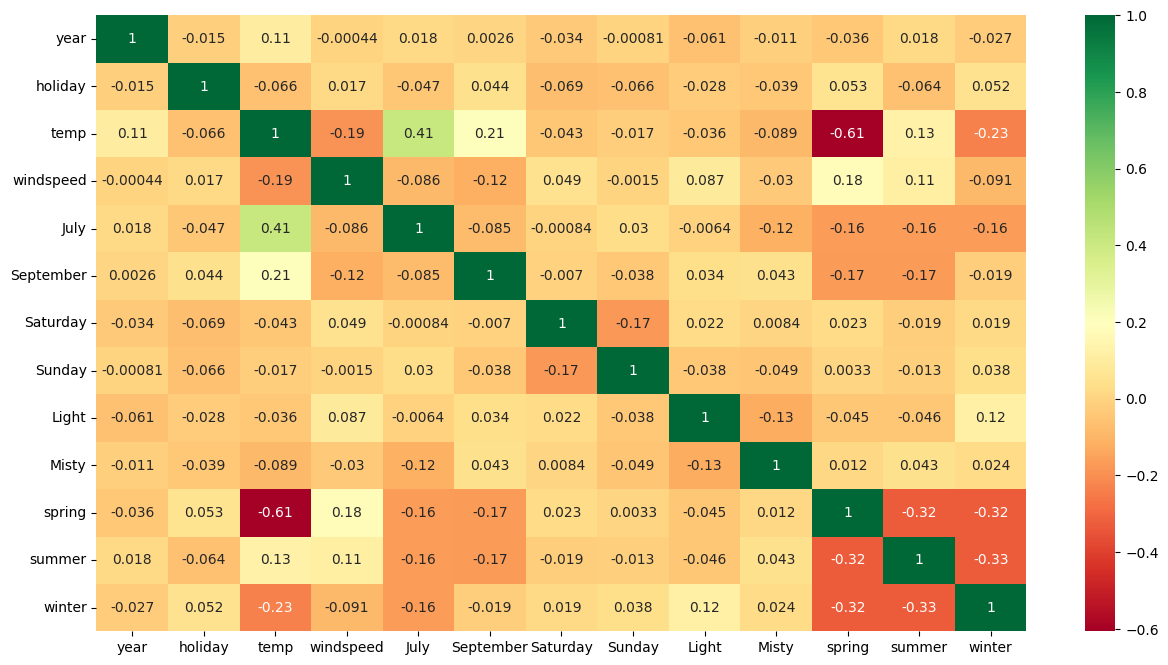

In [1208]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

### Linearity

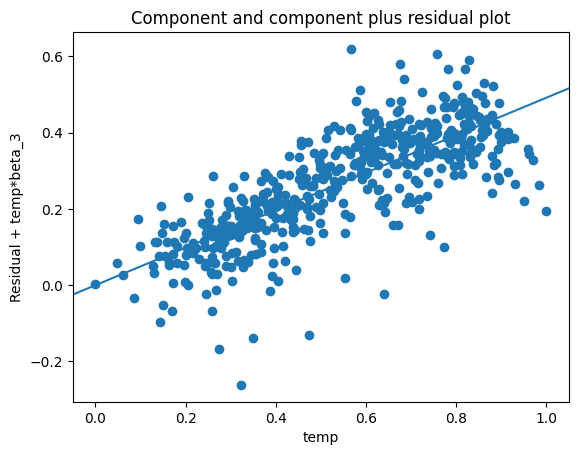

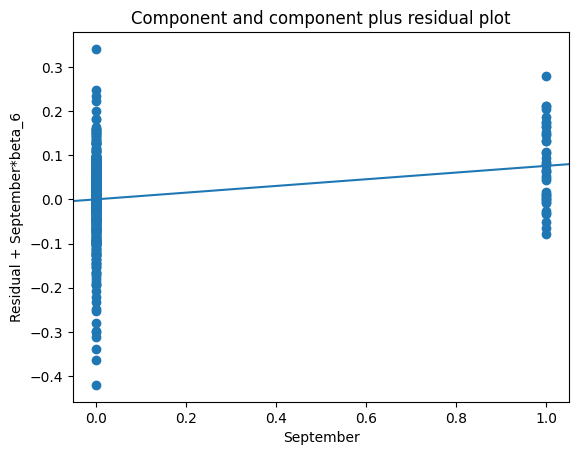

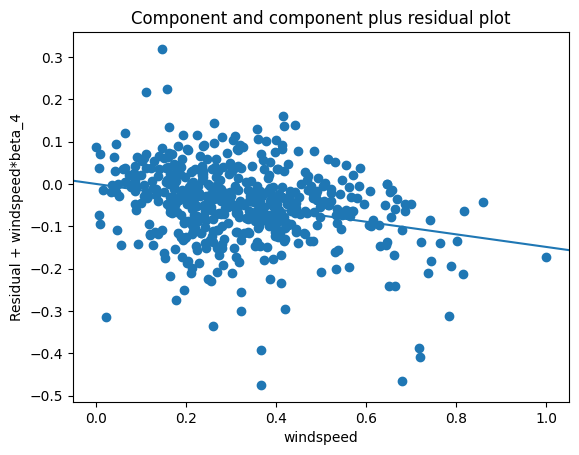

In [1211]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_model_3, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_model_3, 'September')
plt.show()

sm.graphics.plot_ccpr(lr_model_3, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

### Homoscedasticity

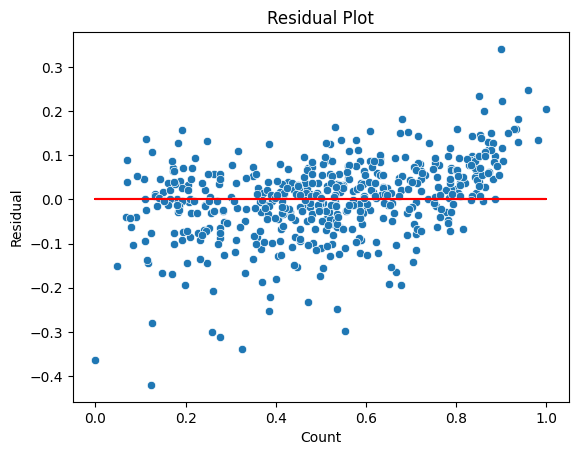

In [1214]:
# Predict the values
y_train_pred = lr_model_3.predict(X_train_lm_3)

# Calculate the residuals
residual = y_train - y_train_pred

# Create the scatter plot
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train, [0]*len(y_train), '-r')  # Plotting the horizontal line at residuals = 0
plt.xlabel('Count')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()


No visible pattern observed from above plot for residuals.

**Independence of residuals
Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation**.

## Step 6 : Making Predictions

In [1218]:
# Scaling
scaling_vars = ["temp", "atemp", "humidity", "windspeed", "count"]
df_test[scaling_vars] = scaler.transform(df_test[scaling_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [1219]:
y_test = df_test.pop('count')
X_test = df_test

In [1220]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lr_model_3 = sm.add_constant(X_test)

y_pred = lr_model_3.predict(X_test_lr_model_3)

# Step 7 : Model Evaluation 

In [1222]:
# calculate R^2
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8082

Text(0, 0.5, 'y_pred')

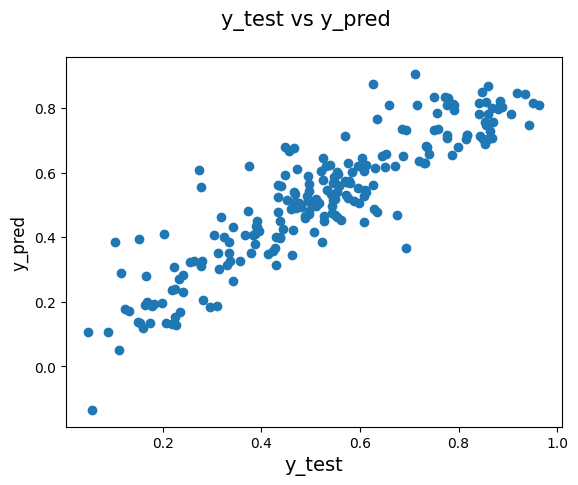

In [1223]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [1224]:
round(lr_model_3.params,3)

const        0.204
year         0.234
holiday     -0.103
temp         0.492
windspeed   -0.149
July        -0.050
September    0.076
Saturday     0.012
Sunday      -0.046
Light       -0.290
Misty       -0.082
spring      -0.066
summer       0.048
winter       0.085
dtype: float64

------------------------------------------------------------

# Final equation 
**count** = 0.161 + year * 0.234 - holiday * 0.101 + temp * 0.492 - windspeed * 0.158 + august * 0.049 - january * 0.043 + september * 0.111 + saturday * 0.011 - sunday * 0.047 - Light * 0.289 - Misty * 0.082 + summer * 0.093 + winter * 0.127

------------------------------------------------------------

## Significant variables to predict the demand for shared bikes
- Year
- holiday
- temperature
- windspeed
- Season *(summer, and winter)*
- months *(January, August, September)*
- Weekday *(saturday, sunday)*
- weathersit *(Light snow/rain, Mist)*

------------------------------------------------------------